In [20]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import plotly.graph_objects as go
from statsmodels import regression
import matplotlib.pyplot as plt
# 그래프에서 한글 깨짐 방지
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')


def adf_test(df, critical_value):
    p_value = adfuller(df)[1]

    if p_value < critical_value:
        print('P-value of Spread : {}'.format(p_value))
        print('TimeSeries Data is Stationary')
        return True
    else:
        print('P-value of Spread : {}'.format(p_value))
        print('TimeSeries Data is Non-Stationary')
        return False


## Pair Trading 함수로 만들기
- 이왕 이렇게 계속 pair trading을 한다면! -> 함수로 만들어서 사용하자
- group을 통해서 etf를 정해주고
- etf_1,etf_2,start_date,end_date,critical_value를 넣어주자

In [2]:
df = pd.read_excel('../Data/df_etf.xlsx',index_col=0)
df_copy = df.copy()

In [ ]:
def pair_trading(df,etf_1,etf_2,group='KODEX',start_date='2020-01-01',end_date='2020-07-01',critical_value=0.05):

    df_copy = df.copy()

    condition = [df_copy.columns[i] for i in range(df_copy.shape[1]) if group in df_copy.columns[i]]
    df_group = df_copy.loc[:,condition]

    df_group_sample = df_group.loc[start_date:end_date, [etf_1,etf_2]].dropna()

    # Regression으로 비율 구하기
    regression_model=regression.linear_model.OLS(df_group_sample[etf_1],df_group_sample[etf_2])
    fitted_model=regression_model.fit() 

    spread = df_group_sample[etf_1] - fitted_model.params.iloc[0] * df_group_sample[etf_2]
    print(adf_test(spread,critical_value=0.05))

    # 그래프 그리기

    data_mean = [spread.mean() for i in range(spread.shape[0])]

    trace1 = go.Scatter(x=spread.index,
                        y=spread,
                        mode='lines',
                        name='spread')

    trace2= go.Scatter(x=spread.index,
                        y=data_mean,
                        mode='lines',
                        name='Spread Mean')

    layout = go.Layout(title='Spread of {} & {}'.format(etf_1,etf_2),
                    yaxis={'tickformat':','})
    fig= go.Figure([trace1,trace2],layout)

    fig.update_layout(template='plotly_dark',
                    width=1000,
                    height=600)

    fig.show()



<Axes: xlabel='Date'>

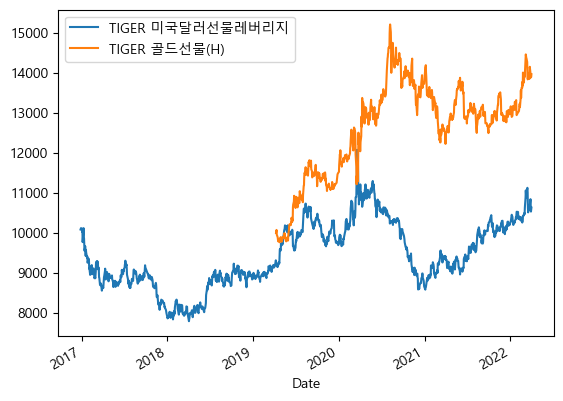

In [21]:
df_sample=df_copy.loc[:,['TIGER 미국달러선물레버리지','TIGER 골드선물(H)']]
df_sample.plot()

In [28]:
pair_trading(df,
             etf_1='TIGER 미국달러선물레버리지',
             etf_2='TIGER 골드선물(H)',
             group='TIGER',
             start_date='2021-11-21',
             end_date='2022-01-01')

P-value of Spread : 0.009007161777074805
TimeSeries Data is Stationary
True


In [ ]:
pair_trading(df,
             etf_1='KODEX 국고채3년',
             etf_2='KODEX 국채선물10년',
             group='KODEX',
             start_date='2021-01-01',
             end_date='2022-03-01')

P-value of Spread : 0.7539715328826084
TimeSeries Data is Non-Stationary
False


In [37]:
pair_trading(df,
             etf_1='KODEX 은행',
             etf_2='KODEX 국채선물10년',
             group='KODEX',
             start_date='2021-01-01',
             end_date='2022-03-01')

P-value of Spread : 0.26467225400469363
TimeSeries Data is Non-Stationary
False


In [38]:
pair_trading(df,
             etf_1='TIGER 골드선물(H)',
             etf_2='TIGER 미국달러선물레버리지',
             group='TIGER',
             start_date='2021-01-01',
             end_date='2022-03-01')

P-value of Spread : 0.02958925968535575
TimeSeries Data is Stationary
True
